# Electoral results per constituency

Campaign Lab on November 16 2019

## Resources

- [Ward to Westminster Parliamentary Constituency to Local Authority District to Upper Tier Local Authority (December 2017) Lookup in the United Kingdom](https://data.gov.uk/dataset/3661957d-305b-42e3-95ce-ef41e727e1df/ward-to-westminster-parliamentary-constituency-to-local-authority-district-to-upper-tier-local-authority-december-2017-lookup-in-the-united-kingdom)
- [Local elections 2019 per ward](https://docs.google.com/spreadsheets/d/1wl1hBYjrCWvMyjO5Pzsez89xFdIky-RLHGgO0r11NNg/edit#gid=635729702)
- [Britain elects](http://britainelects.com/)

## Data

Local elections 2019 per ward is a spreadsheet with the data used by Britain Elects.

We would like to expand the CSV downloaded from Data Gov UK to include geo ids.

CSV from Data Gov UK renamed to wards_lookup.csv.

CSV exported from gdocs renamed to le2019.csv and with the 2 top rows removed.

In [28]:
## imports
import pandas as pd

In [29]:
df_lookup = pd.read_csv('datasets/data_gov_uk/wards_lookup.csv', header=0)
df_lookup.head()

WD17CD                  WD17NM   PCON17CD    PCON17NM    LAD17CD  \
0  E05001621                Bastwell  E14000570   Blackburn  E06000008   
1  E05001518                 Ormesby  E14000891      Redcar  E06000003   
2  E05008942             Burn Valley  E14000733  Hartlepool  E06000001   
3  E05001622  Beardwood with Lammack  E14000570   Blackburn  E06000008   
4  E05008943                De Bruce  E14000733  Hartlepool  E06000001   

                 LAD17NM   UTLA17CD               UTLA17NM  FID  
0  Blackburn with Darwen  E06000008  Blackburn with Darwen    1  
1   Redcar and Cleveland  E06000003   Redcar and Cleveland    2  
2             Hartlepool  E06000001             Hartlepool    3  
3  Blackburn with Darwen  E06000008  Blackburn with Darwen    4  
4             Hartlepool  E06000001             Hartlepool    5

In [30]:
df_results = pd.read_csv('datasets/data_gov_uk/le2019.csv', header=0)
df_results.head()

Ward  Authority    Note  Con  Lab LDem UKIP  Grn Ind(s)  \
0              All Saints  Allerdale     NaN  674  666  401  NaN  429    176   
1   Allhallows & Waverton  Allerdale  Unopp.  NaN  NaN  NaN  NaN  NaN    NaN   
2                Aspatria  Allerdale     NaN  401  239  NaN  NaN  NaN    NaN   
3                 Boltons  Allerdale  Unopp.  NaN  NaN  NaN  NaN  NaN    NaN   
4  Broughton St Bridget's  Allerdale     NaN  281  434  182  NaN  NaN    787   

  Ind Grp  ... Unnamed: 32 Con.3  Lab.3  LDem.3  UKIP.3  Grn.3  Ind.2  IG.2  \
0     NaN  ...         NaN  28.7  -13.7    17.1   -17.9    2.1  -16.3   0.0   
1     NaN  ...         NaN   NaN    NaN     NaN     NaN    NaN    NaN   NaN   
2     344  ...         NaN  40.8   -2.0     0.0   -30.4   -8.0  -35.3  35.0   
3     NaN  ...         NaN   NaN    NaN     NaN     NaN    NaN    NaN   NaN   
4     NaN  ...         NaN  16.7   -4.7    10.8   -22.7  -13.2   13.2   0.0   

   RA.2  Oth.3  
0   0.0    0.0  
1   NaN    NaN  
2   0.0    0.0  
3   NaN    NaN  
4   0.0    0.0  

[5 rows x 42 columns]

We have imported the CSV data into data frames. Particularly the second data frame contains several columns we don't care about, so let's create a new data frame with the relevant columns for our analisys.

Use **info** function to get the column names to be selected.

In [19]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5267 entries, 0 to 5266
Data columns (total 42 columns):
Ward           5267 non-null object
Authority      5267 non-null object
Note           126 non-null object
Con            5078 non-null object
Lab            4432 non-null object
LDem           3187 non-null object
UKIP           1295 non-null object
Grn            2251 non-null object
Ind(s)         1256 non-null object
Ind Grp        367 non-null object
Res Assoc.     82 non-null object
Oth            259 non-null object
Unnamed: 12    0 non-null float64
Con.1          2392 non-null float64
Lab.1          1417 non-null float64
LDem.1         914 non-null float64
UKIP.1         28 non-null float64
Grn.1          192 non-null float64
Ind            609 non-null float64
IG             175 non-null float64
RA             68 non-null float64
Oth.1          24 non-null float64
Unnamed: 22    0 non-null float64
Con.2          5137 non-null float64
Lab.2          5137 non-null float64
L

In [78]:
df_votes = df_results[['Ward', 'Authority', 'Con', 'Lab', 'LDem', 'UKIP', 'Grn', 'Ind(s)', 'Ind Grp', 'Res Assoc.', 'Oth','Con.2', 'Lab.2', 'LDem.2', 'UKIP.2', 'Grn.2', 'Ind.1', 'IG.1', 'RA.1', 'Oth.2']]
df_votes = df_votes.rename(columns={'Con.2':'conservatives', 'Lab.2':'labour', 'LDem.2':'lib_dems', 'UKIP.2':'ukip', 'Grn.2':'greens', 'Ind.1':'independent'})
df_votes.head()

Ward  Authority  Con  Lab LDem UKIP  Grn Ind(s) Ind Grp  \
0              All Saints  Allerdale  674  666  401  NaN  429    176     NaN   
1   Allhallows & Waverton  Allerdale  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
2                Aspatria  Allerdale  401  239  NaN  NaN  NaN    NaN     344   
3                 Boltons  Allerdale  NaN  NaN  NaN  NaN  NaN    NaN     NaN   
4  Broughton St Bridget's  Allerdale  281  434  182  NaN  NaN    787     NaN   

  Res Assoc.  Oth  conservatives  labour  lib_dems  ukip  greens  independent  \
0        NaN  NaN           28.7    28.4      17.1   0.0    18.3          7.5   
1        NaN  NaN            NaN     NaN       NaN   NaN     NaN          NaN   
2        NaN  NaN           40.8    24.3       0.0   0.0     0.0          0.0   
3        NaN  NaN            NaN     NaN       NaN   NaN     NaN          NaN   
4        NaN  NaN           16.7    25.8      10.8   0.0     0.0         46.7   

   IG.1  RA.1  Oth.2  
0   0.0   0.0    0.0  
1   NaN   NaN    NaN  
2  35.0   0.0    0.0  
3   NaN   NaN    NaN  
4   0.0   0.0    0.0

Now let's remove those rows providing no information. Our criteria is to keep rows which have values for Ward, Authority and votes for at least one party; that translates into 3 valid observations for any of the 9 variables.

In [79]:
df_votes.dropna(thresh=3).head()

Ward  Authority  Con  Lab LDem UKIP  Grn Ind(s)  \
0                 All Saints  Allerdale  674  666  401  NaN  429    176   
2                   Aspatria  Allerdale  401  239  NaN  NaN  NaN    NaN   
4     Broughton St Bridget's  Allerdale  281  434  182  NaN  NaN    787   
5               Christchurch  Allerdale  525  596  NaN  NaN  NaN    NaN   
6  Crummock & Derwent Valley  Allerdale  291  105  NaN  NaN  238    NaN   

  Ind Grp Res Assoc.  Oth  conservatives  labour  lib_dems  ukip  greens  \
0     NaN        NaN  NaN           28.7    28.4      17.1   0.0    18.3   
2     344        NaN  NaN           40.8    24.3       0.0   0.0     0.0   
4     NaN        NaN  NaN           16.7    25.8      10.8   0.0     0.0   
5     NaN        NaN  NaN           46.8    53.2       0.0   0.0     0.0   
6     NaN        NaN  NaN           45.9    16.6       0.0   0.0    37.5   

   independent  IG.1  RA.1  Oth.2  
0          7.5   0.0   0.0    0.0  
2          0.0  35.0   0.0    0.0  
4         46.7   0.0   0.0    0.0  
5          0.0   0.0   0.0    0.0  
6          0.0   0.0   0.0    0.0

And we fill NaN with 0 votes for those parties.

In [80]:
df_non_nan_votes = df_votes.dropna(thresh=3).fillna(0)
df_non_nan_votes.head()

Ward  Authority  Con  Lab LDem UKIP  Grn Ind(s)  \
0                 All Saints  Allerdale  674  666  401    0  429    176   
2                   Aspatria  Allerdale  401  239    0    0    0      0   
4     Broughton St Bridget's  Allerdale  281  434  182    0    0    787   
5               Christchurch  Allerdale  525  596    0    0    0      0   
6  Crummock & Derwent Valley  Allerdale  291  105    0    0  238      0   

  Ind Grp Res Assoc. Oth  conservatives  labour  lib_dems  ukip  greens  \
0       0          0   0           28.7    28.4      17.1   0.0    18.3   
2     344          0   0           40.8    24.3       0.0   0.0     0.0   
4       0          0   0           16.7    25.8      10.8   0.0     0.0   
5       0          0   0           46.8    53.2       0.0   0.0     0.0   
6       0          0   0           45.9    16.6       0.0   0.0    37.5   

   independent  IG.1  RA.1  Oth.2  
0          7.5   0.0   0.0    0.0  
2          0.0  35.0   0.0    0.0  
4         46.7   0.0   0.0    0.0  
5          0.0   0.0   0.0    0.0  
6          0.0   0.0   0.0    0.0

In order to join both data frames we need a common column name, so we have renamed *Ward* on the lookup data frame as its original column name is too obscure.

In [81]:
df_lookup['WardAuthority'] = df_lookup['WD17NM'].map(str) + df_lookup['LAD17NM']
df_lookup.head()

WD17CD                  WD17NM   PCON17CD    PCON17NM    LAD17CD  \
0  E05001621                Bastwell  E14000570   Blackburn  E06000008   
1  E05001518                 Ormesby  E14000891      Redcar  E06000003   
2  E05008942             Burn Valley  E14000733  Hartlepool  E06000001   
3  E05001622  Beardwood with Lammack  E14000570   Blackburn  E06000008   
4  E05008943                De Bruce  E14000733  Hartlepool  E06000001   

                 LAD17NM   UTLA17CD               UTLA17NM  FID  \
0  Blackburn with Darwen  E06000008  Blackburn with Darwen    1   
1   Redcar and Cleveland  E06000003   Redcar and Cleveland    2   
2             Hartlepool  E06000001             Hartlepool    3   
3  Blackburn with Darwen  E06000008  Blackburn with Darwen    4   
4             Hartlepool  E06000001             Hartlepool    5   

                                 WardAuthority  
0                BastwellBlackburn with Darwen  
1                  OrmesbyRedcar and Cleveland  
2                        Burn ValleyHartlepool  
3  Beardwood with LammackBlackburn with Darwen  
4                           De BruceHartlepool

In [82]:
df_lookup[['WD17NM','LAD17NM']].head()

WD17NM                LAD17NM
0                Bastwell  Blackburn with Darwen
1                 Ormesby   Redcar and Cleveland
2             Burn Valley             Hartlepool
3  Beardwood with Lammack  Blackburn with Darwen
4                De Bruce             Hartlepool

In [83]:
df_non_nan_votes['Ward'].head()

0                   All Saints
2                     Aspatria
4       Broughton St Bridget's
5                 Christchurch
6    Crummock & Derwent Valley
Name: Ward, dtype: object

In [84]:
df_non_nan_votes['WardAuthority'] = df_non_nan_votes['Ward'].map(str) + df_non_nan_votes['Authority']
df_non_nan_votes.head()

Ward  Authority  Con  Lab LDem UKIP  Grn Ind(s)  \
0                 All Saints  Allerdale  674  666  401    0  429    176   
2                   Aspatria  Allerdale  401  239    0    0    0      0   
4     Broughton St Bridget's  Allerdale  281  434  182    0    0    787   
5               Christchurch  Allerdale  525  596    0    0    0      0   
6  Crummock & Derwent Valley  Allerdale  291  105    0    0  238      0   

  Ind Grp Res Assoc.  ... conservatives  labour  lib_dems  ukip  greens  \
0       0          0  ...          28.7    28.4      17.1   0.0    18.3   
2     344          0  ...          40.8    24.3       0.0   0.0     0.0   
4       0          0  ...          16.7    25.8      10.8   0.0     0.0   
5       0          0  ...          46.8    53.2       0.0   0.0     0.0   
6       0          0  ...          45.9    16.6       0.0   0.0    37.5   

   independent  IG.1  RA.1  Oth.2                       WardAuthority  
0          7.5   0.0   0.0    0.0                 All SaintsAllerdale  
2          0.0  35.0   0.0    0.0                   AspatriaAllerdale  
4         46.7   0.0   0.0    0.0     Broughton St Bridget'sAllerdale  
5          0.0   0.0   0.0    0.0               ChristchurchAllerdale  
6          0.0   0.0   0.0    0.0  Crummock & Derwent ValleyAllerdale  

[5 rows x 21 columns]

In [85]:
df_merged = pd.merge(df_non_nan_votes, df_lookup, how='left', on='WardAuthority')
df_merged.head()

Ward  Authority  Con  Lab LDem UKIP  Grn Ind(s)  \
0                 All Saints  Allerdale  674  666  401    0  429    176   
1                   Aspatria  Allerdale  401  239    0    0    0      0   
2     Broughton St Bridget's  Allerdale  281  434  182    0    0    787   
3               Christchurch  Allerdale  525  596    0    0    0      0   
4  Crummock & Derwent Valley  Allerdale  291  105    0    0  238      0   

  Ind Grp Res Assoc.  ...                       WardAuthority     WD17CD  \
0       0          0  ...                 All SaintsAllerdale  E05003114   
1     344          0  ...                   AspatriaAllerdale  E05003115   
2       0          0  ...     Broughton St Bridget'sAllerdale  E05003117   
3       0          0  ...               ChristchurchAllerdale  E05003118   
4       0          0  ...  Crummock & Derwent ValleyAllerdale        NaN   

                   WD17NM   PCON17CD    PCON17NM    LAD17CD    LAD17NM  \
0              All Saints  E14001053  Workington  E07000026  Allerdale   
1                Aspatria  E14001053  Workington  E07000026  Allerdale   
2  Broughton St Bridget's  E14001053  Workington  E07000026  Allerdale   
3            Christchurch  E14001053  Workington  E07000026  Allerdale   
4                     NaN        NaN         NaN        NaN        NaN   

    UTLA17CD  UTLA17NM     FID  
0  E10000006   Cumbria  1932.0  
1  E10000006   Cumbria  1933.0  
2  E10000006   Cumbria  1662.0  
3  E10000006   Cumbria  1667.0  
4        NaN       NaN     NaN  

[5 rows x 30 columns]

And save the results.

In [86]:
df_merged.to_csv('datasets/data_gov_uk/merged.csv', encoding='utf-8', index=False)

## Graphics

Now let's draw some nice graphics.

Download map data from here:

- https://data.gov.uk/dataset/bdc59578-c531-41d2-a90d-b668888c67b1/wards-december-2018-full-extent-boundaries-gb

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [88]:
shapefile = 'datasets/data_gov_uk/Wards_December_2018_Full_Extent_Boundaries_GB.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)

gdf.head()

objectid     wd18cd          wd18nm wd18nmw   bng_e   bng_n      long  \
0         1  E05000026           Abbey    None  544434  184378  0.081291   
1         2  E05000027          Alibon    None  549247  185196  0.150987   
2         3  E05000028       Becontree    None  546863  185869  0.116912   
3         4  E05000029  Chadwell Heath    None  548266  189340  0.138596   
4         5  E05000030       Eastbrook    None  550774  186272  0.173453   

         lat    st_areasha   st_lengths  \
0  51.539822  1.282925e+06  6244.885015   
1  51.545921  1.364442e+06  6353.917640   
2  51.552601  1.288082e+06  6341.645817   
3  51.583420  3.384190e+06  9603.411571   
4  51.555191  3.450577e+06  8987.802248   

                                            geometry  
0  POLYGON ((0.08550710225358864 51.5370431602157...  
1  POLYGON ((0.1319252357811307 51.54376345461694...  
2  POLYGON ((0.1074560418754761 51.55200231362011...  
3  POLYGON ((0.1470103797472177 51.5756804538549,...  
4  POLYGON ((0.161601914179729 51.5433277536546, ...

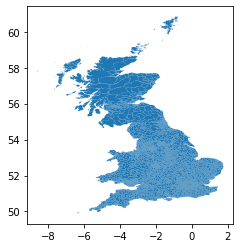

In [99]:
gdf.plot()

## Normalized votes

As we're interested in plotting trends we want to normalize votes, and we'll plot the percentage of the votes every party gets compared to the eight remainging parties.

In [89]:
df_votos = pd.read_csv('datasets/data_gov_uk/merged.csv', header=0)
df_votos.head()

Ward  Authority  Con  Lab LDem UKIP  Grn Ind(s)  \
0                 All Saints  Allerdale  674  666  401    0  429    176   
1                   Aspatria  Allerdale  401  239    0    0    0      0   
2     Broughton St Bridget's  Allerdale  281  434  182    0    0    787   
3               Christchurch  Allerdale  525  596    0    0    0      0   
4  Crummock & Derwent Valley  Allerdale  291  105    0    0  238      0   

  Ind Grp Res Assoc.  ...                       WardAuthority     WD17CD  \
0       0          0  ...                 All SaintsAllerdale  E05003114   
1     344          0  ...                   AspatriaAllerdale  E05003115   
2       0          0  ...     Broughton St Bridget'sAllerdale  E05003117   
3       0          0  ...               ChristchurchAllerdale  E05003118   
4       0          0  ...  Crummock & Derwent ValleyAllerdale        NaN   

                   WD17NM   PCON17CD    PCON17NM    LAD17CD    LAD17NM  \
0              All Saints  E14001053  Workington  E07000026  Allerdale   
1                Aspatria  E14001053  Workington  E07000026  Allerdale   
2  Broughton St Bridget's  E14001053  Workington  E07000026  Allerdale   
3            Christchurch  E14001053  Workington  E07000026  Allerdale   
4                     NaN        NaN         NaN        NaN        NaN   

    UTLA17CD  UTLA17NM     FID  
0  E10000006   Cumbria  1932.0  
1  E10000006   Cumbria  1933.0  
2  E10000006   Cumbria  1662.0  
3  E10000006   Cumbria  1667.0  
4        NaN       NaN     NaN  

[5 rows x 30 columns]

In [90]:
gdf['wd18cd']

0       E05000026
1       E05000027
2       E05000028
3       E05000029
4       E05000030
          ...    
8647    W05001034
8648    W05001035
8649    W05001036
8650    W05001037
8651    W05001038
Name: wd18cd, Length: 8652, dtype: object

In [91]:
df_votos[['WD17CD', 'Lab', 'labour']]

WD17CD  Lab  labour
0     E05003114  666    28.4
1     E05003115  239    24.3
2     E05003117  434    25.8
3     E05003118  596    53.2
4           NaN  105    16.6
...         ...  ...     ...
5245  E05010327  729    18.3
5246  E05010328  233     7.7
5247  E05010329  213     8.2
5248  E05010330  945    25.0
5249  E05010331  112     7.1

[5250 rows x 3 columns]

In [92]:
df_votes_map = gdf.merge(df_votos, left_on='wd18cd', right_on='WD17CD')
df_votes_map['labour']

0       11.6
1       31.5
2       13.7
3       16.0
4       50.5
        ... 
3555    28.0
3556    13.9
3557     6.1
3558     7.9
3559     7.9
Name: labour, Length: 3560, dtype: float64

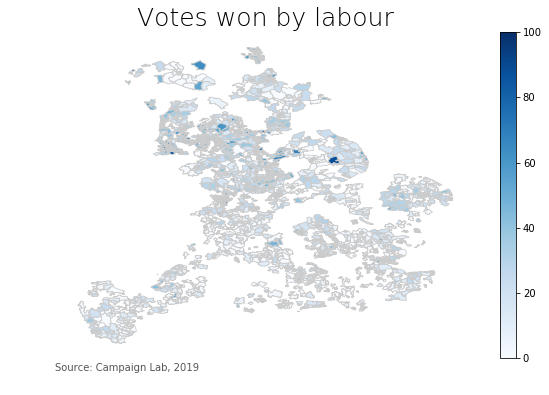

In [93]:
party = 'labour'

# set the range for the choropleth
vmin, vmax = 0, 100
fig, ax = plt.subplots(1, figsize=(10, 6))
df_votes_map.plot(column=party, 
              cmap='Blues', 
              linewidth=0.8, 
              ax=ax, 
              edgecolor='0.8')

ax.axis('off')
data_title = f"Votes won by {party}"
ax.set_title(data_title, 
             fontdict={'fontsize': '25', 
                       'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Campaign Lab, 2019', 
            xy=(0.1, .08), 
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=10, 
            color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
